<a href="https://colab.research.google.com/github/hoangvn111/Data-Cleaning-and-Analysis/blob/master/Data_Cleaning_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Aggregation

In [2]:
import pandas as pd 

happiness2015 = pd.read_csv('/content/drive/MyDrive/my_datasets/Data Cleaning and Analysis/World_Happiness_2015.csv')

## Introduce data

In [3]:
first_5 = happiness2015.head().copy()

In [4]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
first_5

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Descriptions for some of the columns we'll be working with:

* Country - Name of the country.
* Region - Name of the region the country belongs to.
* Happiness Rank - The rank of the country, as determined by its happiness score.
* Happiness Score - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.
* Family - The estimated extent to which family contributes to the happiness score.
* Freedom - The estimated extent to which freedom contributes to the happiness score.
* Generosity - The estimated extent to which generosity contributes to the happiness score.

## Use Loops to Aggregate Data

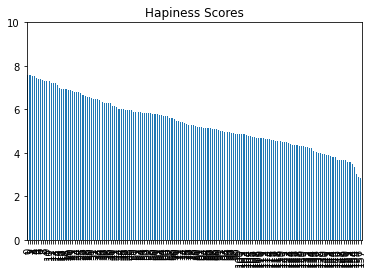

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

happiness2015['Happiness Score'].plot(kind='bar', title='Hapiness Scores', ylim=(0,10))
plt.show()

Plotting the data in its current form isn't helpful at all! There are so many data points that we can't see any of the values or labels.
You may have noticed that each country in the **happiness2015** dataframe is assigned to a region, specified in the **Region** column. We can use the Series.unique() method to confirm the unique regions:

In [7]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

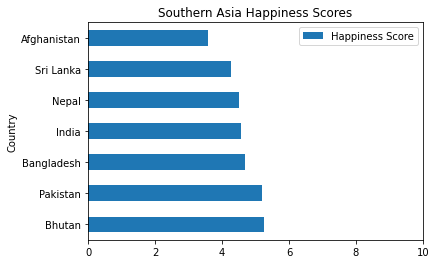

In [8]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

It's much easier to read this visualization - we can clearly see the labels and values. However, we wouldn't know if the Southern Asia region is representative of the entire world unless we look at the other regions. What we really want is to create a visualization that uses one number, a summary statistic like the mean, to summarize the data for each region.

In [9]:
mean_happiness = {}
regions= happiness2015['Region'].unique()
for reg in regions:
    #1. Split the dataframe into groups.
    region_group = happiness2015[happiness2015['Region'] == reg]
    #2. Apply a function to each group
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure
    mean_happiness[reg] = region_mean

mean_happiness

{'Australia and New Zealand': 7.285,
 'Central and Eastern Europe': 5.332931034482758,
 'Eastern Asia': 5.626166666666666,
 'Latin America and Caribbean': 6.144681818181818,
 'Middle East and Northern Africa': 5.406899999999999,
 'North America': 7.273,
 'Southeastern Asia': 5.317444444444445,
 'Southern Asia': 4.580857142857143,
 'Sub-Saharan Africa': 4.202800000000001,
 'Western Europe': 6.689619047619048}

## Combine Aggregation Methods with GroupBy




In [10]:
happiness2015.groupby('Region').mean()['Happiness Score']

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [11]:
# Use get_group() to select data for a certain group.
aus_nz = happiness2015.groupby('Region').get_group('Australia and New Zealand') 
aus_nz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [12]:
grouped = happiness2015.groupby('Region')
grouped.groups # Get index of rows

{'Australia and New Zealand': [8, 9], 'Central and Eastern Europe': [30, 43, 44, 51, 53, 54, 55, 58, 59, 61, 63, 68, 69, 72, 76, 79, 82, 85, 86, 88, 92, 94, 95, 103, 105, 110, 126, 129, 133], 'Eastern Asia': [37, 45, 46, 71, 83, 99], 'Latin America and Caribbean': [11, 13, 15, 22, 24, 26, 29, 31, 32, 39, 40, 41, 42, 47, 50, 52, 56, 57, 64, 97, 104, 118], 'Middle East and Northern Africa': [10, 19, 21, 27, 34, 38, 48, 62, 67, 75, 81, 91, 102, 106, 107, 109, 111, 134, 135, 155], 'North America': [4, 14], 'Southeastern Asia': [23, 33, 60, 73, 74, 89, 98, 128, 144], 'Southern Asia': [78, 80, 108, 116, 120, 131, 152], 'Sub-Saharan Africa': [70, 77, 84, 90, 93, 96, 100, 112, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 127, 130, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157], 'Western Europe': [0, 1, 2, 3, 5, 6, 7, 12, 16, 17, 18, 20, 25, 28, 35, 36, 49, 65, 66, 87, 101]}

In [13]:
north_america = grouped.get_group('North America')
na_group = happiness2015.iloc[[4,14]]
na_group == north_america

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,True,True,True,True,True,True,True,True,True,True,True,True
14,True,True,True,True,True,True,True,True,True,True,True,True


In [14]:
# GroupBy.size() method to confirm the size of each region group
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

## Agg() Medthod

In [15]:
# GroupBy.agg() method can perform both aggregations at once
import numpy as np
grouped.agg([np.max, np.min, np.sum, np.mean])

Happiness Rank       ... Dystopia Residual          
                                          amax amin  ...               sum      mean
Region                                               ...                            
Australia and New Zealand                   10    9  ...           4.53071  2.265355
Central and Eastern Europe                 134   31  ...          58.62059  2.021400
Eastern Asia                               100   38  ...          10.08964  1.681607
Latin America and Caribbean                119   12  ...          57.69670  2.622577
Middle East and Northern Africa            156   11  ...          39.60017  1.980009
North America                               15    5  ...           4.96187  2.480935
Southeastern Asia                          145   24  ...          16.04718  1.783020
Southern Asia                              153   79  ...          14.11738  2.016769
Sub-Saharan Africa                         158   71  ...          80.79920  2.019980
Western Europe                             102    1  ...          45.17489  2.151185

[10 rows x 40 columns]

## Aggregation with Pivot Tables

In [16]:
# DataFrame.pivot_table() method
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)
pv_happiness

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


In [17]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


When we set the margins parameter equal to True, All will be added to the index of the resulting dataframe and the corresponding value will be the result of applying the aggregation method to the entire column


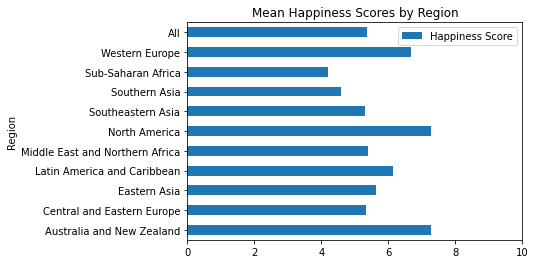

In [18]:
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10))

In [19]:
happiness2015['Happiness Score'].mean() == pv_happiness['Happiness Score'].mean()


False

In [20]:
pv_happiness['Happiness Score'].mean()

5.748648575587915

In [21]:
happiness2015['Happiness Score'].mean()

5.3757341772151905

In [22]:
grouped = happiness2015.groupby('Region')[['Happiness Score', 'Family']].mean()

## Aggregation Multiple Columns and Function with Pilot Tables

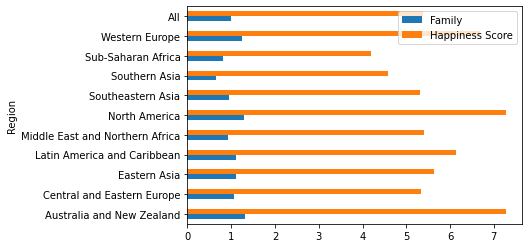

In [23]:
grouped_pv_table = happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region', aggfunc=np.mean, margins=True)
grouped_pv_table.plot(kind='barh')
plt.show()

In [24]:
grouped = happiness2015.groupby('Region')[['Happiness Score', 'Family']]
happy_family_stats = grouped.agg([np.min, np.max, np.mean])
pv_happy_family_stats = pd.pivot_table(happiness2015, values=['Happiness Score', 'Family'], index='Region',  aggfunc=[np.min, np.max, np.mean], margins=True)

pv_happy_family_stats

amin  ...            mean
                                  Family  ... Happiness Score
Region                                    ...                
Australia and New Zealand        1.30923  ...        7.285000
Central and Eastern Europe       0.38562  ...        5.332931
Eastern Asia                     0.94675  ...        5.626167
Latin America and Caribbean      0.74302  ...        6.144682
Middle East and Northern Africa  0.47489  ...        5.406900
North America                    1.24711  ...        7.273000
Southeastern Asia                0.62736  ...        5.317444
Southern Asia                    0.30285  ...        4.580857
Sub-Saharan Africa               0.00000  ...        4.202800
Western Europe                   0.89318  ...        6.689619
All                              0.00000  ...        5.375734

[11 rows x 6 columns]

# Combining Data With Pandas

In [25]:
happiness2016 = pd.read_csv('/content/drive/MyDrive/my_datasets/Data Cleaning and Analysis/World_Happiness_2016.csv')
happiness2017 = pd.read_csv('/content/drive/MyDrive/my_datasets/Data Cleaning and Analysis/World_Happiness_2017.csv')

In [26]:
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

In [27]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

In [28]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


## Combining Dataframes with the Concat Function

head_2015, head_2016 has the same shape

In [29]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016], axis=0)
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)

In [30]:
concat_axis0

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [31]:
concat_axis1

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


## Combining Dataframes with the Concat Function Continued

head_2015, head_2016 hasn't the same shape

In [32]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

In [33]:
concat_axis0 = pd.concat([head_2015, head_2016], axis=0)
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)

In [34]:
concat_axis0

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
0,2016,Denmark,7.526,NaN
1,2016,Switzerland,7.509,NaN
2,2016,Iceland,7.501,NaN


In [35]:
concat_axis1

,Year,Country,Happiness Score,Standard Error,Country,Happiness Score,Year
0,2015,Switzerland,7.587,0.03411,Denmark,7.526,2016.0
1,2015,Iceland,7.561,0.04884,Switzerland,7.509,2016.0
2,2015,Denmark,7.527,0.03328,Iceland,7.501,2016.0
3,2015,Norway,7.522,0.03880,NaN,NaN,NaN


## Combining Dataframes with Different Shapes Using the Concat Function 

In [36]:
concat_update_index = pd.concat([head_2015, head_2016], ignore_index=True)
concat_update_index

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2016,Denmark,7.526,NaN
5,2016,Switzerland,7.509,NaN
6,2016,Iceland,7.501,NaN


## Joining Dataframes with the Merge Function 

In [37]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

In [38]:
print(three_2015)
print('\n')
print(three_2016)

   Country  Happiness Rank  Year
2  Denmark               3  2015
3   Norway               4  2015
4   Canada               5  2015


   Country  Happiness Rank  Year
2  Iceland               3  2016
3   Norway               4  2016
4  Finland               5  2016


In [39]:
merged = pd.merge(left=three_2015, right=three_2016, on='Country')

In [40]:
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


## Joining on Columns with the Merge Function

In [41]:
# how option
merged_left = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
merged_left_updated = pd.merge(left=three_2016, right=three_2015, how='left', on='Country')

print(merged_left)
print('\n')
print(merged_left_updated)

   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Denmark                 3    2015               NaN     NaN
1   Norway                 4    2015               4.0  2016.0
2   Canada                 5    2015               NaN     NaN


   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Iceland                 3    2016               NaN     NaN
1   Norway                 4    2016               4.0  2015.0
2  Finland                 5    2016               NaN     NaN


In [42]:
# suffixes option
merged_suffixes = pd.merge(left=three_2015, right=three_2016, suffixes=('_2015', '_2016'), how='left', on='Country')
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, suffixes=('_2016', '_2015'), how='left', on='Country')

print(merged_suffixes)
print('\n')
print(merged_updated_suffixes)

   Country  Happiness Rank_2015  Year_2015  Happiness Rank_2016  Year_2016
0  Denmark                    3       2015                  NaN        NaN
1   Norway                    4       2015                  4.0     2016.0
2   Canada                    5       2015                  NaN        NaN


   Country  Happiness Rank_2016  Year_2016  Happiness Rank_2015  Year_2015
0  Iceland                    3       2016                  NaN        NaN
1   Norway                    4       2016                  4.0     2015.0
2  Finland                    5       2016                  NaN        NaN


## Join on Index with the Merge Function

In [43]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merge_index = pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015', '_2016'))
merge_index_left = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'), how='left')

print(merge_index)
print('\n')
print(merge_index_left)

  Country_2015  Happiness Rank_2015  ...  Happiness Rank_2016 Year_2016
2      Denmark                    3  ...                    3      2016
3       Norway                    4  ...                    4      2016
4       Canada                    5  ...                    5      2016

[3 rows x 6 columns]


  Country_2015  Happiness Rank_2015  ...  Happiness Rank_2016 Year_2016
2      Denmark                    3  ...                  3.0    2016.0
3       Norway                    4  ...                  4.0    2016.0
4       Canada                    5  ...                  5.0    2016.0
5      Finland                    6  ...                  NaN       NaN

[4 rows x 6 columns]


In [44]:
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))
merge_index_left = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'), how='left')

print(merge_index)
print('/n')
print(merge_index_left)

  Country_2015  Happiness Rank_2015  ...  Happiness Rank_2016 Year_2016
2      Denmark                    3  ...                    3      2016
3       Norway                    4  ...                    4      2016
4       Canada                    5  ...                    5      2016

[3 rows x 6 columns]
/n
  Country_2015  Happiness Rank_2015  ...  Happiness Rank_2016 Year_2016
2      Denmark                    3  ...                  3.0    2016.0
3       Norway                    4  ...                  4.0    2016.0
4       Canada                    5  ...                  5.0    2016.0
5      Finland                    6  ...                  NaN       NaN

[4 rows x 6 columns]


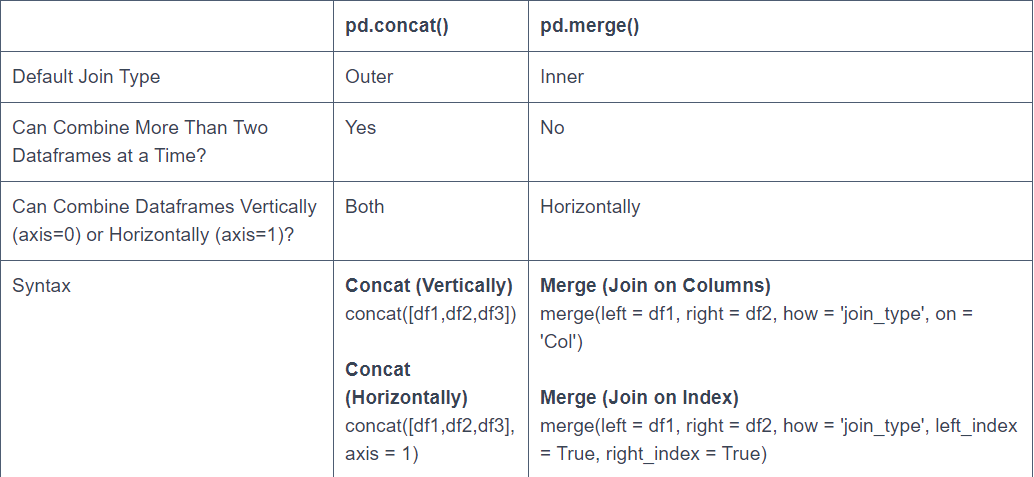

## Challenge: Combine Data and Create a Visualization

In [45]:
means = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=np.mean)
means

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


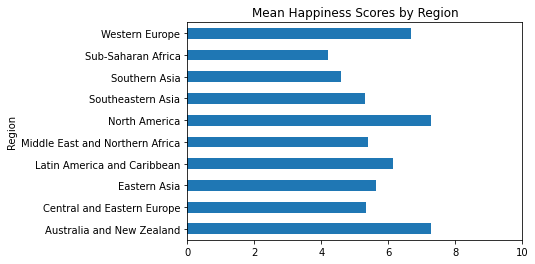

In [46]:
means.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

In [47]:
happiness2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')

In [48]:
happiness2017.rename(columns={'Happiness.Score':'Happiness Score'}, inplace=True)

In [49]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], axis=0)
combined

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.349510,0.94143,0.665570,0.41978,0.296780,2.51738,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.402230,0.94784,0.628770,0.14145,0.436300,2.70201,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.360580,0.87464,0.649380,0.48357,0.341390,2.49204,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.330950,0.88521,0.669730,0.36503,0.346990,2.46531,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.322610,0.90563,0.632970,0.32957,0.458110,2.45176,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,NaN,NaN,3.471,NaN,NaN,0.945707,NaN,0.581844,NaN,0.252756,NaN,2017,NaN,NaN,151.0,3.543030,3.398970,0.368746,0.326425,0.455220,0.540061
151,Syria,NaN,NaN,3.462,NaN,NaN,0.396103,NaN,0.081539,NaN,0.493664,NaN,2017,NaN,NaN,152.0,3.663669,3.260331,0.777153,0.500533,0.151347,1.061574
152,Tanzania,NaN,NaN,3.349,NaN,NaN,1.041990,NaN,0.390018,NaN,0.354256,NaN,2017,NaN,NaN,153.0,3.461430,3.236570,0.511136,0.364509,0.066035,0.621130
153,Burundi,NaN,NaN,2.905,NaN,NaN,0.629794,NaN,0.059901,NaN,0.204435,NaN,2017,NaN,NaN,154.0,3.074690,2.735310,0.091623,0.151611,0.084148,1.683024


In [50]:
pivot_table_combined = combined.pivot_table('Happiness Score', 'Year')
pivot_table_combined

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


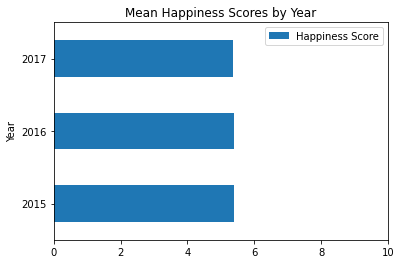

In [51]:
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0,10), legend=True)

# Transforming Data With Pandas

Use **World Happiness 2015** dataset .descriptions for some of the other columns we'll work with in this mission:

* Country - Name of the country
* Region - Name of the region the country belongs to
* Happiness Rank - The rank of the country, as determined by its happiness score
* Happiness Score - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10
* Dystopia Residual- Represents the extent to which the factors above over or under explain the happiness score. Don't worry too much about this column - you won't need in depth knowledge of it to complete this mission.

In [52]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }
happiness2015.rename(mapping, axis=1, inplace=True)

## Apply a Function Element-wise Using the Map and Apply Methods. map(), apply()

In [53]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
    
economy_impact_map = happiness2015['Economy'].map(label)
economy_impact_apply = happiness2015['Economy'].apply(label)

economy_impact_map.equals(economy_impact_apply)

True

## Apply a Function Element-wise Using the Map and Apply Methods. map(), apply() Continued

Note that these methods don't modify the original series. If we want to work with the new series in the original dataframe, we must either assign the results back to the original column or create a new column. We recommend creating a new column, in case you need to reference the original values

In [54]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

happiness2015['Economy Impact'] = happiness2015['Economy'].map(label)

In [55]:
happiness2015[['Economy','Economy Impact']].head()

,Economy,Economy Impact
0,1.39651,High
1,1.30232,High
2,1.32548,High
3,1.45900,High
4,1.32629,High


In [56]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
# economy_map = happiness2015['Economy'].map(label, x = .8)  # TypeError: map() got an unexpected keyword argument 'x'
economy_impact_apply = happiness2015['Economy'].apply(label, x= .8)

 Series.apply() method to apply a function with additional arguments element-wise - the Series.map() method will return an error.

## Apply a Function Element-wise to Multiple Columns Using Applymap Method()

In [57]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact = happiness2015[factors].applymap(label)

In [58]:
factors_impact.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


## Apply Functions along an Axis using the Apply method()

In [59]:
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


Notice that we used the df.apply() method to transform multiple columns. This is only possible because the pd.value_counts function operates on a series. If we tried to use the df.apply() method to apply a function that works element-wise to multiple columns, we'd get an error:

In [60]:
# def label(element):
#     if element > 1:
#         return 'High'
#     else:
#         return 'Low'
# happiness2015[factors].apply(label)

In [61]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    percentage = num / den 
    return percentage

v_counts_pct = factors_impact.apply(v_counts)

In [62]:
v_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


## Apply Functions along an Axis using the Apply method() Continued

In [63]:
#Calculate the sum of the factor columns in each row.
happiness2015['Factors Sum'] = happiness2015[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']].sum(axis=1)
#Display the first five rows of the result and the Happiness Score column.
happiness2015[['Happiness Score', 'Factors Sum']].head()

,Happiness Score,Factors Sum
0,7.587,7.58696
1,7.561,7.56092
2,7.527,7.52708
3,7.522,7.52222
4,7.427,7.42694


In [64]:
def percentages(col):
    div = col.divide(happiness2015['Happiness Score'])
    percentage = div * 100
    return percentage

factor_percentages = happiness2015[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']].apply(percentages)

In [65]:
factor_percentages.head()

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445


## Reshaping Data with the Melt Function()

In [66]:
happy_two = happiness2015.iloc[:2]
happy_two

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year,Economy Impact,Factors Sum
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,High,7.58696
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,High,7.56092


In [67]:
pd.melt(happy_two, id_vars=['Country'], value_vars=['Economy', 'Family', 'Health'])

,Country,variable,value
0,Switzerland,Economy,1.39651
1,Iceland,Economy,1.30232
2,Switzerland,Family,1.34951
3,Iceland,Family,1.40223
4,Switzerland,Health,0.94143
5,Iceland,Health,0.94784


In [68]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

meil = happiness2015.melt(id_vars=main_cols, value_vars=factors)
meil

,Country,Region,Happiness Rank,Happiness Score,variable,value
0,Switzerland,Western Europe,1,7.587,Economy,1.39651
1,Iceland,Western Europe,2,7.561,Economy,1.30232
2,Denmark,Western Europe,3,7.527,Economy,1.32548
3,Norway,Western Europe,4,7.522,Economy,1.45900
4,Canada,North America,5,7.427,Economy,1.32629
...,...,...,...,...,...,...
1101,Rwanda,Sub-Saharan Africa,154,3.465,Dystopia Residual,0.67042
1102,Benin,Sub-Saharan Africa,155,3.340,Dystopia Residual,1.63328
1103,Syria,Middle East and Northern Africa,156,3.006,Dystopia Residual,0.32858
1104,Burundi,Sub-Saharan Africa,157,2.905,Dystopia Residual,1.83302


In [69]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']



melt = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)

melt['Percentage'] = round((melt['value'] / melt['Happiness Score']) * 100,2)



In [70]:
melt

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86
...,...,...,...,...,...,...,...
1101,Rwanda,Sub-Saharan Africa,154,3.465,Dystopia Residual,0.67042,19.35
1102,Benin,Sub-Saharan Africa,155,3.340,Dystopia Residual,1.63328,48.90
1103,Syria,Middle East and Northern Africa,156,3.006,Dystopia Residual,0.32858,10.93
1104,Burundi,Sub-Saharan Africa,157,2.905,Dystopia Residual,1.83302,63.10


## Challenge: Aggregation the Data and Create Data Visualization

In [71]:
pv_melt = melt.pivot_table(values='value', index='variable')
pv_melt['Percentage'] = round((pv_melt['value'] / pv_melt.sum()[0]) * 100,1)

pv_melt


,value,Percentage
variable,,
Dystopia Residual,2.098977,39.0
Economy,0.846137,15.7
Family,0.991046,18.4
Freedom,0.428615,8.0
Generosity,0.237296,4.4
Health,0.630259,11.7
Trust,0.143422,2.7


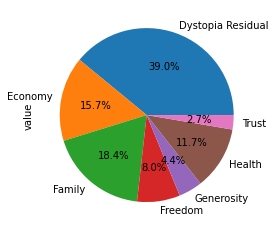

In [72]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct)

pv_melt.plot(kind='pie', y='value',autopct=lambda pct: func(pct, melt['value']), legend=False)

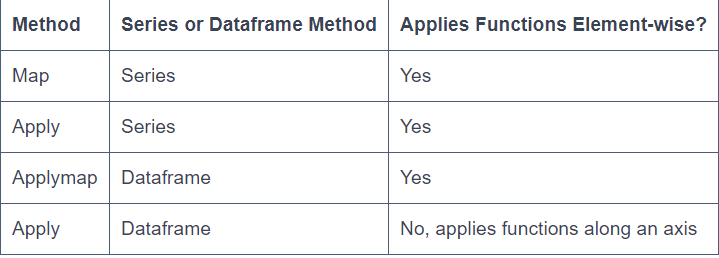

# Working with Strings in Pandas 

Working with the 2015 world Happiness Report and addictional economic data from the World Bank 

In [73]:
import pandas as pd

world_dev = pd.read_csv('/content/drive/MyDrive/my_datasets/Data Cleaning and Analysis/World_dev.csv')

In [74]:
print(happiness2015.shape)
print(world_dev.shape)

(158, 15)
(247, 31)


Descriptions for the columns we'll be working with:

* ShortName - Name of the country
* Region - The region the country belongs to
* IncomeGroup - The income group the country belongs to, based on Gross * National Income (GNI) per capita
* CurrencyUnit - Name of country's currency
* SourceOfMostRecentIncomeAndExpenditureData - The name of the survey used to collect the income and expenditure data
* SpecialNotes - Contains any miscellaneous notes about the data

## Combining Data

In [75]:
merged = pd.merge(left=happiness2015, right=world_dev, how='left', left_on='Country', right_on='ShortName')
print(merged.shape)
print(merged.head(3))


(158, 46)
       Country        Region_x  ...  LatestTradeData  LatestWaterWithdrawalData
0  Switzerland  Western Europe  ...           2013.0                     2000.0
1      Iceland  Western Europe  ...           2013.0                     2005.0
2      Denmark  Western Europe  ...           2013.0                     2009.0

[3 rows x 46 columns]


In [76]:
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged.rename(columns=col_renaming, inplace=True)
merged.head(3)


,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year,Economy Impact,Factors Sum,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region_y,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,High,7.58696,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,NaN,Europe & Central Asia,High income: OECD,CH,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,High,7.56092,ISL,Iceland,Iceland,Republic of Iceland,IS,Iceland krona,NaN,Europe & Central Asia,High income: OECD,IS,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,High,7.52708,DNK,Denmark,Denmark,Kingdom of Denmark,DK,Danish krone,NaN,Europe & Central Asia,High income: OECD,DK,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0


## Using Apply to Transform Strings

Extract the unit of currency without the leading nationality. For example, instead of "Danish krone" or "Norwegian krone", we just needed "krone".

In [77]:
def extract_last_world(element):
    element = str(element)
    element = element.split()
    return element[-1]

merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_world)

In [78]:
merged['Currency Apply']

0       franc
1       krona
2       krone
3       krone
4      dollar
        ...  
153     franc
154     franc
155       nan
156     franc
157     franc
Name: Currency Apply, Length: 158, dtype: object

## Vectorized String Methods Overview

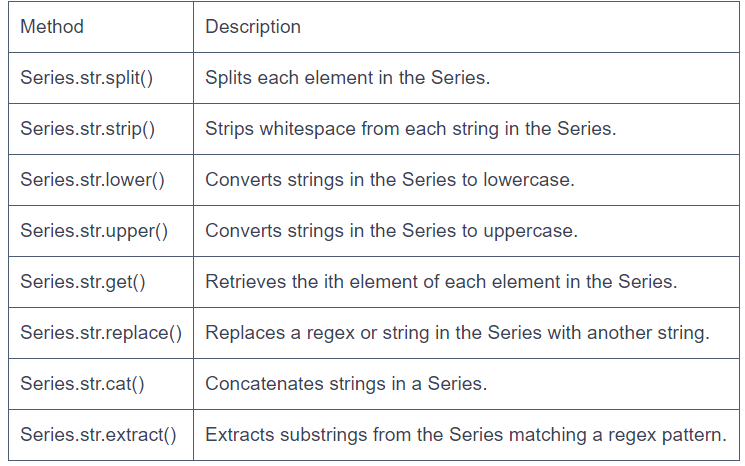

In [79]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)

In [80]:
merged['Currency Vectorized'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

## Exploring Missing Values with Vectorized String Methods

In [81]:
merged['CurrencyUnit'].isnull().sum()

13

In [82]:
def compute_lengths(element):
    return len(str((element)))

lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)

In [83]:
lengths_apply.value_counts(dropna=False)

14    21
4     20
12    17
13    14
3     13
15    13
16    12
18     9
17     9
11     8
22     7
25     5
19     3
9      2
26     1
20     1
23     1
10     1
39     1
Name: CurrencyUnit, dtype: int64

Since the original column had 13 missing values and NaN doesn't appear in the list of unique values above, we know our function must have treated NaN as a string and returned a length of 3 for each NaN value. This doesn't make sense - missing values shouldn't be treated as strings. They should instead have been excluded from the calculation.

If we wanted to exclude missing values, we'd have to update our function to something like this:

In [84]:
def compute_lengths(element):
    if pd.isnull(element):
        pass
    else:
        return len(str(element))
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)

In [85]:
lengths_apply.value_counts(dropna=False) 

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

In [86]:
lengths= merged['CurrencyUnit'].str.len()

In [87]:
lengths.value_counts(dropna=False)

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

value_counts contain NaN, it means the Series.str.len() method excluded them and didn't treat them as strings

## Finding Specific Words in Strings

In pandas, regular expression is integrated with vectorized string methods to make finding and extracting patterns of characters easier

In [88]:
pattern = r"[Nn]ational accounts"
national_accounts = merged['SpecialNotes'].str.contains(pattern)
national_accounts

0       NaN
1       NaN
2       NaN
3       NaN
4      True
       ... 
153    True
154     NaN
155     NaN
156     NaN
157    True
Name: SpecialNotes, Length: 158, dtype: object

In [89]:
## Finding Special Words in Strings Continued

In [90]:
national_accounts = merged['SpecialNotes'].str.contains(r"[Nn]ational accounts")
#Return the value counts for each value in the Series, including missing values.
national_accounts.value_counts(dropna=False)

NaN      65
True     54
False    39
Name: SpecialNotes, dtype: int64

In [91]:
# boolean indexing to return only the rows that contain "national accounts" or "National accounts" in the SpecialNotes column:
# merged[national_accounts]

It looks like we got an error now because of the NaN values

In [92]:
national_accounts = merged['SpecialNotes'].str.contains(pattern, na=False)
merged_national_accounts = merged[national_accounts]
merged_national_accounts.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year,Economy Impact,Factors Sum,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region_y,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,High,7.42694,CAN,Canada,Canada,Canada,CA,Canadian dollar,Fiscal year end: March 31; reporting period fo...,North America,High income: OECD,CA,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015,High,7.36370,SWE,Sweden,Sweden,Kingdom of Sweden,SE,Swedish krona,Fiscal year end: June 30; reporting period for...,Europe & Central Asia,High income: OECD,SE,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015,High,7.28608,NZL,New Zealand,New Zealand,New Zealand,NZ,New Zealand dollar,Fiscal year end: March 31; reporting period fo...,East Asia & Pacific,High income: OECD,NZ,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,NaN,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,High,7.28406,AUS,Australia,Australia,Commonwealth of Australia,AU,Australian dollar,Fiscal year end: June 30; reporting period for...,East Asia & Pacific,High income: OECD,AU,Original chained constant price data are resca...,2013/14,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011,2015,High,7.11951,USA,United States,United States,United States of America,US,U.S. dollar,Fiscal year end: September 30; reporting perio...,North America,High income: OECD,US,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,d

## Extracting Substrings from a Series

In [93]:
pattern = r"(\d{4})"
years = merged['SpecialNotes'].str.extract(pattern)
years

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
153,2006
154,NaN
155,NaN
156,NaN


When we used the Series.str.extract() method, we enclosed our regular expression in parentheses. The parentheses indicate that only the character pattern matched should be extracted and returned in a series. We call this a **capturing group**.

**Series.str.extract("(pattern)")**

## Extracting All Mathches of a Pattern from a Series 

Make the results easier to read by using the df.set_index() method to set the Country column as the index.

In [94]:
merged = merged.set_index('Country')

In [95]:
merged.head(3)

,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year,Economy Impact,Factors Sum,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region_y,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,High,7.58696,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,NaN,Europe & Central Asia,High income: OECD,CH,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0,franc,franc
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,High,7.56092,ISL,Iceland,Iceland,Republic of Iceland,IS,Iceland krona,NaN,Europe & Central Asia,High income: OECD,IS,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0,krona,krona
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,High,7.52708,DNK,Denmark,Denmark,Kingdom of Denmark,DK,Danish krone,NaN,Europe & Central Asia,High income: OECD,DK,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0,krone,krone


In [96]:
# syntax (?P<Column_Name>...)
pattern = r'(?P<Years>[1-2][0-9]{3})'
merged['SpecialNotes'].str.extractall(pattern)

Years
Country     match      
Finland     0      1999
            1      1999
Netherlands 0      1999
            1      2037
            2      1999
...                 ...
Rwanda      1      2011
            2      2008
Togo        0      2013
            1      2000
            2      2000

[164 rows x 1 columns]

In [97]:
pattern = r'(?P<Years>[12]\d{3})'
years = merged['IESurvey'].str.extractall(pattern)
years.value_counts()

Years
2012     33
2010     28
2011     22
2013     12
2009      8
2005      6
2008      6
2007      4
2004      3
2006      1
2003      1
2002      1
2000      1
1999      1
1998      1
1995      1
1992      1
dtype: int64

## Extracting more than one group of pattern a Series 

When we tried to extract all of the years from the IESurvey column using the extractall method in the last exercise, we were unsuccessful because some of our years had the following format:

2018/19

In [98]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})(/)?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)
years.head(5)

,,First_Year,1,Second_Year
Country,match,,,
Switzerland,0,2004,NaN,NaN
Iceland,0,2010,NaN,NaN
Denmark,0,2010,NaN,NaN
Norway,0,2010,NaN,NaN
Canada,0,2010,NaN,NaN


In [99]:
years.sort_values('Second_Year')

,,First_Year,1,Second_Year
Country,match,,,
Kenya,0,2005,/,06
Angola,0,2008,/,09
Mozambique,0,2008,/,09
Nigeria,0,2009,/,10
Mali,0,2009,/,10
...,...,...,...,...
Guinea,0,2012,NaN,NaN
Burkina Faso,0,2009,NaN,NaN
Afghanistan,0,2008,NaN,NaN


In [100]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)
first_two_year = years['First_Year'].str.extract('(\d{2})')
first_two_year[0]
years['Second_Year'] = first_two_year[0] + years['Second_Year']
years

,,First_Year,Second_Year
Country,match,,
Switzerland,0,2004,NaN
Iceland,0,2010,NaN
Denmark,0,2010,NaN
Norway,0,2010,NaN
Canada,0,2010,NaN
...,...,...,...
Afghanistan,0,2008,NaN
Rwanda,0,2010,2011
Benin,0,2011,2012


* If part of the regex isn't grouped using parantheses, (), it won't be extracted.
* When we add a string to a column using the plus sign, +, pandas will add that string to every value in the column. Note that the strings will be added together without any spaces.

## Challenge: Clean a String Column, Aggregation the Data and Plot the Results

| Current Values       | Updated Values |
|----------------------|----------------|
| Upper middle income  | UPPER MIDDLE   |
| Lower middle income  | LOWER MIDDLE   |
| High income: OECD    | HIGHT OECD     |
| Low income           | LOW            |
| High income: nonOECD | HIGH NONOECD   |




In [101]:
merged['IncomeGroup'].value_counts()

Upper middle income     39
Lower middle income     35
High income: OECD       30
Low income              24
High income: nonOECD    17
Name: IncomeGroup, dtype: int64

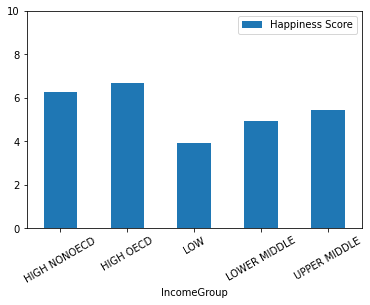

In [102]:
import matplotlib.pyplot as plt

# remove the whitespace at the end of the strings.
merged['IncomeGroup'] =  merged['IncomeGroup'].str.rstrip(' ')
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))
plt.show()